In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils import data

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torchvision
from torchvision import transforms
import os

import glob
from PIL import Image
from tqdm import tqdm

In [2]:

def make_dataset(root):
    imgs = []
    labels=[]
    n = len(os.listdir(root)) // 2  #因为数据集中一套训练数据包含有训练图和mask图，所以要除2
    for i in range(n):
        img = os.path.join(root, "%03d.png" % i)
        mask = os.path.join(root, "%03d_mask.png" % i)
        imgs.append(img)
        labels.append(mask)
    return imgs,labels
root='E:/肝脏CT边缘分割/data/liver/liver/train/'
root_test='E:/肝脏CT边缘分割/data/liver/liver/val/'
train_imgs,train_labels=make_dataset(root)
test_imgs,test_labels=make_dataset(root_test)
###

pic=glob.glob('E:/肝脏CT边缘分割/data/liver/liver/train/*.png')
lable_k=[]
pic_data=[]
for i in range(len(pic)):
    if 'mask' in pic[i]:
        lable_k.append(pic[i])
    else:
        pic_data.append(pic[i])
lable_k
pic_data
print(pic_data[:5])

['E:/肝脏CT边缘分割/data/liver/liver/train\\000.png', 'E:/肝脏CT边缘分割/data/liver/liver/train\\001.png', 'E:/肝脏CT边缘分割/data/liver/liver/train\\002.png', 'E:/肝脏CT边缘分割/data/liver/liver/train\\003.png', 'E:/肝脏CT边缘分割/data/liver/liver/train\\004.png']


In [3]:
lable_k[:5]

['E:/肝脏CT边缘分割/data/liver/liver/train\\000_mask.png',
 'E:/肝脏CT边缘分割/data/liver/liver/train\\001_mask.png',
 'E:/肝脏CT边缘分割/data/liver/liver/train\\002_mask.png',
 'E:/肝脏CT边缘分割/data/liver/liver/train\\003_mask.png',
 'E:/肝脏CT边缘分割/data/liver/liver/train\\004_mask.png']

In [4]:
class LiverDataset(data.Dataset):
    def __init__(self, imgs,labels, imgs_transform=None,labels_transform=None):
        self.imgs = imgs
        self.labels=labels
        self.img_transform=imgs_transform
        self.labels_transform=labels_transform
  
    def __getitem__(self, index):
        imgs= self.imgs[index]
        labels=self.labels[index]
        
        transformer=self.img_transform 
        transformer_label=self.labels_transform
        
        imgs_open = Image.open(imgs)
        labels_open = Image.open(labels)
        
        imgs_f=transformer(imgs_open)
        labels_f=transformer_label(labels_open)
 
        return imgs_f, labels_f
 
    def __len__(self):
        return len(self.imgs)


In [5]:
train_transforms_img = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),  # -> [0,1],
    transforms.RandomHorizontalFlip(0.2),
])
train_transforms_label = transforms.Compose([ 
    transforms.ToTensor(),
    transforms.Resize((128,128))# -> [0,1]
])
test_transforms_img = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),  # -> [0,1]

])
test_transforms_label = transforms.Compose([ 
    transforms.ToTensor(),
    transforms.Resize((128,128))# -> [0,1]
])

In [6]:
train_data=LiverDataset(train_imgs,train_labels,train_transforms_img,train_transforms_label)
test_data=LiverDataset(test_imgs,test_labels,test_transforms_img,test_transforms_label)

In [7]:
dl_train=data.DataLoader(train_data,batch_size=16,shuffle=True)
dl_test=data.DataLoader(test_data,batch_size=16,shuffle=True)

(128, 128, 3)

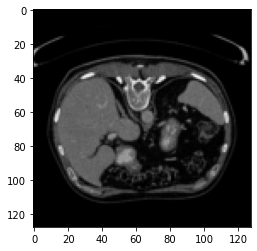

In [8]:
img,lable= next(iter(dl_train))
img.shape
a=img[0].permute(1,2,0).numpy()
plt.imshow(a[::1])
a.shape

In [9]:
a[0]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0

In [10]:
import torchvision

Net=torchvision.models.segmentation.deeplabv3_resnet50(pretrained=False, progress=True, num_classes=2)
Net
model=Net
model

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [11]:
img,lable= next(iter(dl_train))
model.to('cuda')


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [12]:
import torch
if torch.cuda.is_available():
    model.to('cuda')

In [13]:
from torch.optim import lr_scheduler
optim = torch.optim.Adam(model.parameters(), lr=0.001)
exp_lr_scheduler = lr_scheduler.StepLR(optim, step_size=7, gamma=0.1)

In [14]:
loss_fn = nn.CrossEntropyLoss()

In [15]:
def fit(epoch, model, trainloader, testloader):
    correct = 0
    total = 0
    running_loss = 0
    epoch_iou = []
    model.train()
    for x, y in tqdm(trainloader):
        if torch.cuda.is_available():
            x, y = x.to('cuda'), y.to('cuda')
        y_pred = model(x)
        y_pred=y_pred['out']
        y= torch.squeeze(y).long()
        loss = loss_fn(y_pred,y)
        optim.zero_grad()
        loss.backward()
        optim.step()
        exp_lr_scheduler.step()
        with torch.no_grad():
            y_pred = torch.argmax(y_pred, dim=1)
            correct += (y_pred == y).sum().item()
            total += y.size(0)
            running_loss += loss.item()
            ##iou
            intersection = torch.logical_and(y, y_pred)
            union = torch.logical_or(y, y_pred)
            batch_iou = torch.sum(intersection) / torch.sum(union)
            batch_iou=batch_iou.cpu().numpy()
            epoch_iou.append(batch_iou)
        
    epoch_loss = running_loss / len(trainloader.dataset)
    epoch_acc = correct / (total*128*128)
        
        
    test_correct = 0
    test_total = 0
    test_running_loss = 0 
    epoch_test_iou = []
    model.eval()
    with torch.no_grad():
        for x, y in tqdm(testloader):
            if torch.cuda.is_available():
                x, y = x.to('cuda'), y.to('cuda')
            y_pred = model(x)
            y_pred=y_pred['out']
            y= torch.squeeze(y).long()
            loss = loss_fn(y_pred,y)
            y_pred = torch.argmax(y_pred, dim=1)
            test_correct += (y_pred == y).sum().item()
            test_total += y.size(0)
            test_running_loss += loss.item()
            
            intersection = torch.logical_and(y, y_pred)
            union = torch.logical_or(y, y_pred)
            batch_iou = torch.sum(intersection) / torch.sum(union)
            batch_iou=batch_iou.cpu().numpy()
            epoch_test_iou.append(batch_iou)
    
    epoch_test_loss = test_running_loss / len(testloader.dataset)
    epoch_test_acc = test_correct /( test_total *128*128)
    
    static_dict=model.state_dict()
    torch.save(static_dict,'./data/checkpoint/{}_train_acc_{}_test_acc_{}.pth'.format(epoch,round(epoch_acc, 3),round(epoch_test_acc,3)))
    
    print('epoch: ', epoch, 
          'loss： ', round(epoch_loss, 3),
          'accuracy:', round(epoch_acc, 3),
          'IOU:', round(np.mean(epoch_iou), 3),
          'test_loss： ', round(epoch_test_loss, 3),
          'test_accuracy:', round(epoch_test_acc, 3),
           'test_iou:', round(np.mean(epoch_test_iou), 3)
             )
        
    return epoch_loss, epoch_acc, epoch_test_loss, epoch_test_acc

In [16]:
len(train_data)

400

In [17]:
epochs =50 

In [18]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []

for epoch in range(epochs):
    epoch_loss, epoch_acc, epoch_test_loss, epoch_test_acc = fit(epoch,
                                                                 model,
                                                                 dl_train,
                                                                 dl_test)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    test_loss.append(epoch_test_loss)
    test_acc.append(epoch_test_acc)

 36%|█████████████████████████████▉                                                     | 9/25 [00:03<00:07,  2.26it/s]


KeyboardInterrupt: 

In [ ]:
my_model = Net
PATH='./data/checkpoint/2_train_acc_0.99_test_acc_0.949.pth'
my_model.load_state_dict(torch.load(PATH))

In [ ]:
image, mask = next(iter(dl_test))
image=image.to('cuda')
pred_mask = my_model(image)
pred_mask=pred_mask['out']
mask=torch.squeeze(mask)
mask.shape

In [ ]:
pred_mask
pred_mask.shape
pred_mask=pred_mask.cpu()

In [ ]:
num=3
plt.figure(figsize=(10, 10))
for i in range(num):
    plt.subplot(num, 3, i*num+1)
    plt.imshow(image[i].permute(1,2,0).cpu().numpy())
    plt.subplot(num, 3, i*num+2)
    plt.imshow(mask[i].cpu().numpy())
    plt.subplot(num, 3, i*num+3)
    plt.imshow(torch.argmax(pred_mask[i].permute(1,2,0), axis=-1).detach().numpy())

In [ ]:
image, mask = next(iter(dl_test))
mask
plt.figure(figsize=(10, 10))
mask[1]
image=image*255
plt.imshow(image[1].permute(1,2,0).cpu().numpy())

In [ ]:
image, mask = next(iter(dl_test))
my_model=my_model.cpu()
pred_mask = my_model(image)

plt.figure(figsize=(10, 10))
for i in range(num):
    plt.subplot(num, 3, i*num+1)
    image=image/255
    plt.imshow(image[i].permute(1,2,0).cpu().numpy())
    plt.subplot(num, 3, i*num+2)
    mask=mask/255
    plt.imshow(mask[i].permute(1,2,0).cpu().numpy())
    plt.subplot(num, 3, i*num+3)
    plt.imshow(torch.argmax(pred_mask[i].permute(1,2,0), axis=-1).detach().numpy())